In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from data_processing_functions import *


In [2]:
df = pd.read_csv('ml_project1_data.csv')

In [3]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


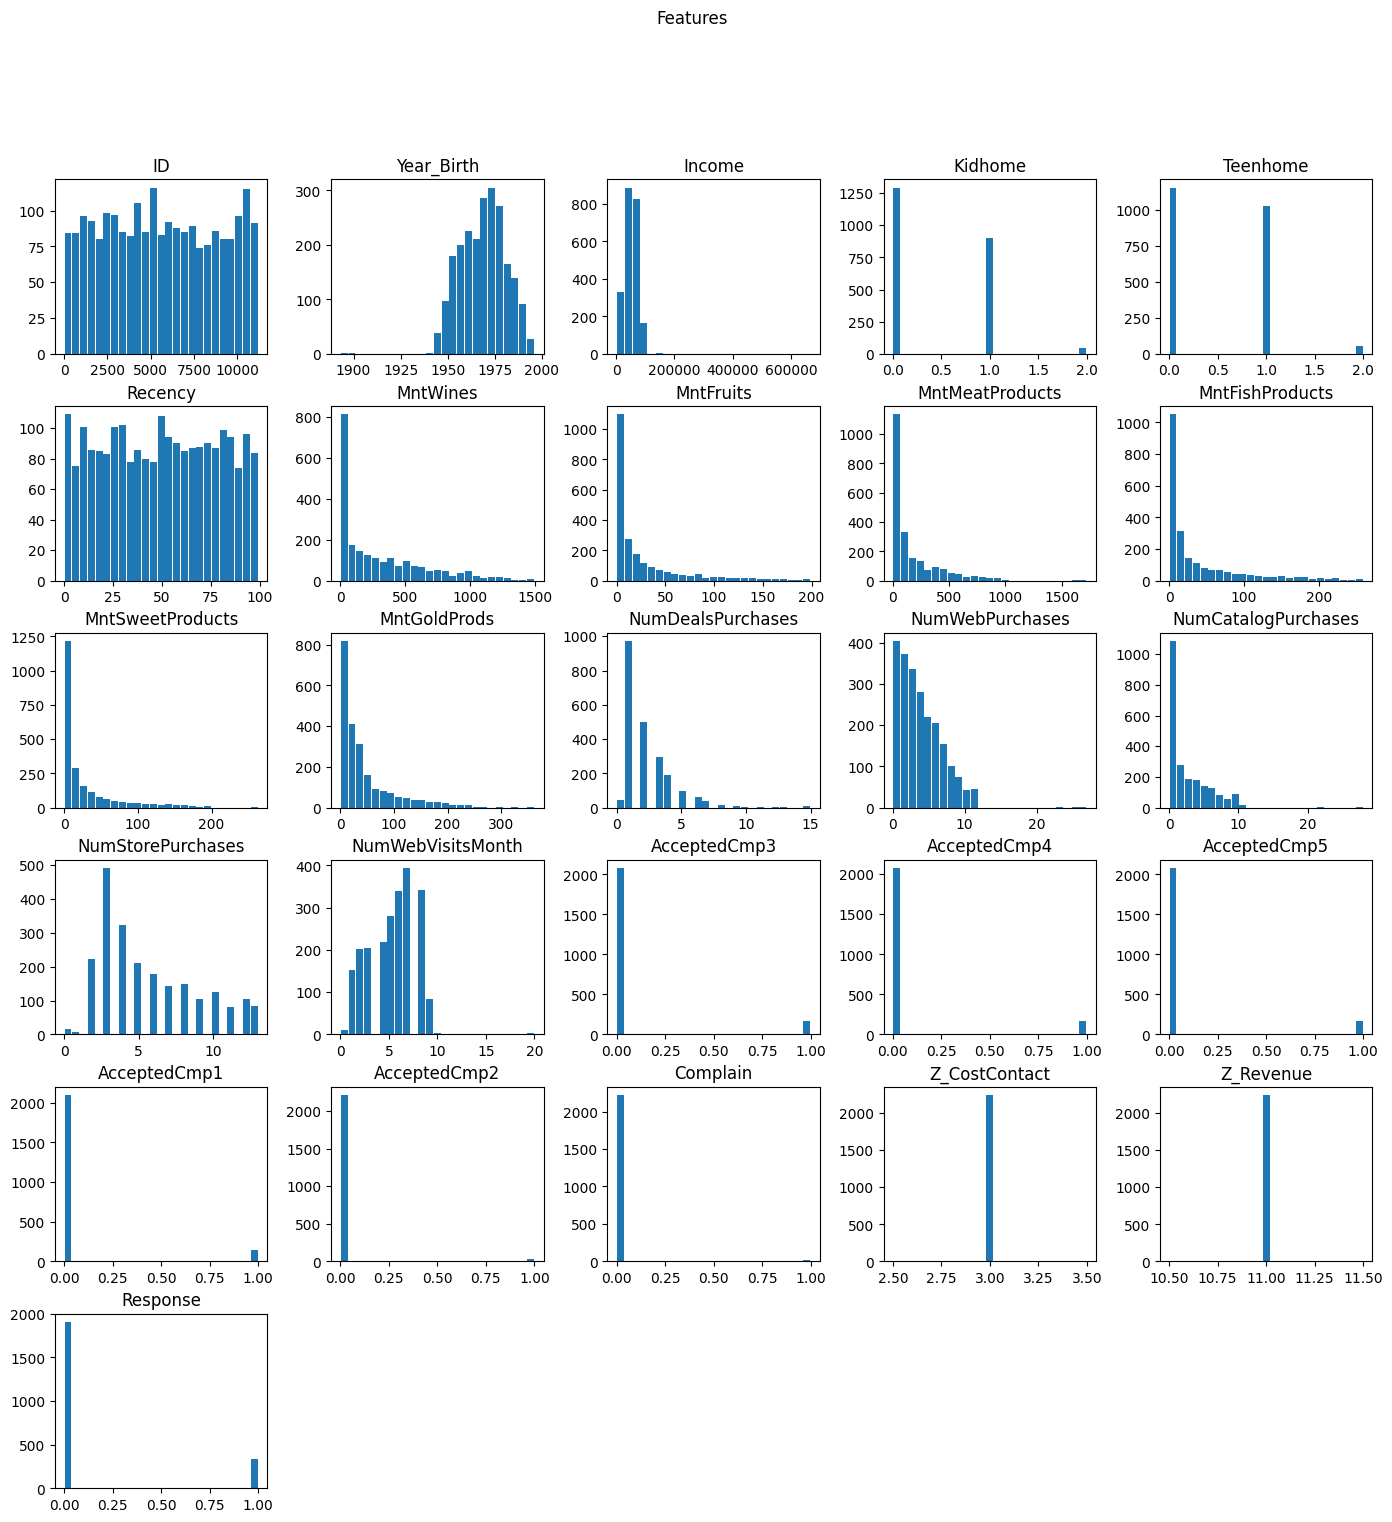

In [17]:
ax = df.hist(bins=25, grid=False, figsize=(17,17), zorder=2, rwidth=0.9)
plt.suptitle("Features")
plt.show()

In [6]:
# Tratamento de Dados
# Valores ausentes

check_missing_values(df)

 ============== Resumo de Valores Nulos ============== 
Coluna  Valores Nulos  Porcentagem (%)
Income             24             1.07

Total de colunas com valores nulos: 1


In [8]:
# Input da mediana na coluna Income
df_treated = df.copy()
treat_missing_values_column_median(df_treated, 'Income')


Valores ausentes na coluna 'Income' foram tratados com sucesso usando a mediana (51381.5).


In [9]:
# Tratamento de Dados
# Outliers
# Pela visão geral dos dados, duas colunas possuem outliers: Income e Year Birth. 

check_outliers_column(df, 'Year_Birth', factor=1.5)

 ============== Resumo de Outliers: Year_Birth ============== 
Limite inferior: 1932.00
Limite superior: 2004.00

Número de outliers: 3
Porcentagem de outliers: 0.13%

Resumo estatístico dos outliers:
count       3.000000
mean     1897.333333
std         3.785939
min      1893.000000
25%      1896.000000
50%      1899.000000
75%      1899.500000
max      1900.000000
Name: Year_Birth, dtype: float64

Primeiros 10 valores outliers:
[1900, 1893, 1899]


In [10]:
check_outliers_column(df, 'Income', factor=1.5)

 ============== Resumo de Outliers: Income ============== 
Limite inferior: 0.00
Limite superior: 118350.50

Número de outliers: 8
Porcentagem de outliers: 0.36%

Resumo estatístico dos outliers:
count         8.000000
mean     221604.500000
std      179850.404431
min      153924.000000
25%      157090.500000
50%      157488.000000
75%      161201.500000
max      666666.000000
Name: Income, dtype: float64

Primeiros 10 valores outliers:
[157243.0, 162397.0, 153924.0, 160803.0, 157733.0, 157146.0, 156924.0, 666666.0]


In [12]:
treat_outliers_column_median(df_treated,'Year_Birth')

Outliers na coluna 'Year_Birth' foram tratados com sucesso usando a mediana (1970.0).


In [13]:
treat_outliers_column_median(df_treated,'Income')

Outliers na coluna 'Income' foram tratados com sucesso usando a mediana (51381.5).
